In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
np.random.seed(10)
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset) 

In [3]:
X = dataset[:, 0:8]
Y = dataset[:, 8]
#Y = to_categorical(Y)
#標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [4]:
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]

In [16]:
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
#kernel_initializer="random_uniform", 
#bias_initializer="ones",

In [17]:
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          epochs=14, batch_size=10)

Train on 690 samples, validate on 78 samples
Epoch 1/14
690/690 [==============================] - 1s 2ms/step - loss: 0.6920 - acc: 0.6304 - val_loss: 0.6874 - val_acc: 0.6154
Epoch 2/14
690/690 [==============================] - 0s 545us/step - loss: 0.6614 - acc: 0.6710 - val_loss: 0.6639 - val_acc: 0.6538
Epoch 3/14
690/690 [==============================] - 0s 575us/step - loss: 0.6316 - acc: 0.6884 - val_loss: 0.6412 - val_acc: 0.6667
Epoch 4/14
690/690 [==============================] - 0s 489us/step - loss: 0.5988 - acc: 0.7043 - val_loss: 0.6225 - val_acc: 0.6795
Epoch 5/14
690/690 [==============================] - 0s 567us/step - loss: 0.5670 - acc: 0.7261 - val_loss: 0.6063 - val_acc: 0.7179
Epoch 6/14
690/690 [==============================] - 0s 484us/step - loss: 0.5393 - acc: 0.7551 - val_loss: 0.5924 - val_acc: 0.7308
Epoch 7/14
690/690 [==============================] - 0s 382us/step - loss: 0.5180 - acc: 0.7652 - val_loss: 0.5820 - val_acc: 0.7692
Epoch 8/14
690/690 

In [18]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("train accuracy",accuracy)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("test accuracy",accuracy)
# 測試資料集的預測值
Y_pred = model.predict_classes(X_test, batch_size=10, verbose=0)
print(Y_pred)

train accuracy 0.7826086949611055
test accuracy 0.7692307661741208
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


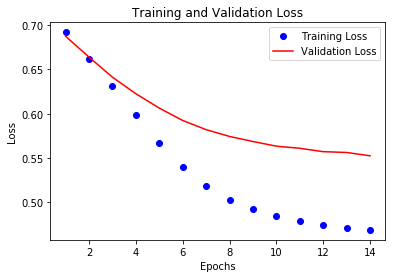

In [19]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

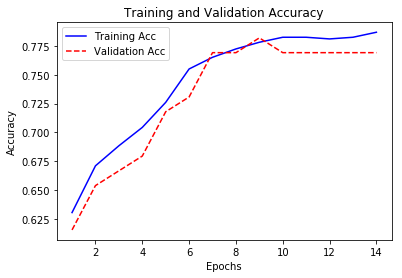

In [20]:
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()